### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
# TODO: 
# [x] Load energy data
# [x] Exclude header and footer information
# [x] Remove first two columns
# [x] Change the column labels
# [x] Convert Energy Supply to gigajoules
# [x] Represent missing data as NaN values
# [x] Clean the country names        
# [x] Rename the given list of countries
# [x] Load GDP data and skip the header
# [x] Rename the list of countries
# [x] Prepare dataframes for merging
# [x] Merge ScimEn and energy
# [x] Merge merged_df with GDP


In [544]:
import pandas as pd, re, numpy as np 

def energy():
    energy = pd.read_excel('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/Energy Indicators.xls')
    energy = energy.iloc[17:244]
    energy = energy[['Unnamed: 2','Unnamed: 3','Unnamed: 4', 'Unnamed: 5']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

    energy = energy.replace('...', np.nan)
    energy['Energy Supply'] *= 1000000


    def clean_names(country_name):
        if re.search('\(.*', country_name):
            pos = re.search('\(.*', country_name).start()
            return country_name[:pos-1]
        else:
            return country_name

    energy['Country'] = energy['Country'].replace(to_replace=r'[0-9]', value='', regex=True)
    energy['Country'] = energy['Country'].apply(clean_names)
    energy['Country'].replace({"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}, inplace=True)

    return energy


def gdp():
    GDP = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/world_bank.csv', header=4)
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}, inplace=True)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    GDP = GDP[['Country', '2006', '2007', '2008','2009','2010', '2011','2012','2013','2014','2015']]

    return GDP

def scimen():

    ScimEn = pd.read_excel('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/scimagojr-3.xlsx')
    return ScimEn.iloc[:16]

energy, GDP, ScimEn = energy(), gdp(), scimen()

def answer_one():
    
    tdf_in = pd.merge(GDP, energy, on = 'Country')
    tdf_in = pd.merge(tdf_in, ScimEn, on = 'Country')

    return tdf_in.where(tdf_in['Rank'] <= 15).dropna().sort_values(by='Rank')

    # merged_df = pd.merge(ScimEn[['Rank', 'Documents', 'Country', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index']].iloc[:16],
    #                     energy[['Energy Supply', 'Country', 'Energy Supply per Capita', '% Renewable']], 
    #                     how='inner', left_on='Country', right_on='Country')

    # # Merge merged_df with GDP dataframe
    # complete_df = pd.merge(merged_df, 
    #                        GDP[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']],
    #                        left_on='Country', right_on = 'Country Name', how='inner')

    # # Set index to 'Country' and drop 'Country Name'
    # complete_df.set_index('Country', inplace=True)
    # del complete_df['Country Name']

answer_one()


,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
3,China,3992331462570.89014,4559041383517.92969,4997775145605.95996,5459247267275.13965,6039658508485.58984,6612490294273.65039,7124977970399.61035,7672447738017.41992,8230120617793.51953,...,127191000000.00000,93.00000,19.75491,1,127050,126767,597237,411683,4.70000,138
14,United States,14792303791800.00000,15055395304800.00000,15011490541400.00000,14594842181900.00000,14964372000000.00000,15204019634600.00000,15542161722300.00000,15773666098800.00000,16156618476000.00000,...,90838000000.00000,286.00000,11.57098,2,96661,94747,792274,265436,8.20000,230
11,Japan,5496541517363.30957,5617035943770.73047,5558526873313.82031,5251308399909.32031,5498717815809.76953,5473738114222.04980,5569101602926.17969,5644658523313.41992,5642884448582.19043,...,18984000000.00000,149.00000,10.23282,3,30504,30287,223024,61554,7.31000,134
7,United Kingdom,2419630700401.72998,2482203235475.89990,2470614405284.29980,2367047611711.99023,2403504326328.79980,2450911011124.85010,2479808627472.18994,2533370110012.35986,2605643189894.93018,...,7920000000.00000,124.00000,10.60047,4,20944,20357,206091,37874,9.84000,139
13,Russian Federation,1385792607182.58008,1504071117741.30005,1583004071092.11011,1459199142720.26001,1524917468442.01001,1589942641764.29004,1645875899596.27002,1666934123163.15991,1678708855070.86011,...,30709000000.00000,214.00000,17.28868,5,18534,18301,34266,12422,1.85000,57
2,Canada,1564468853329.44995,1596739898466.32007,1612713061250.23999,1565144676082.31006,1613406134731.12012,1664086754804.88989,1693132927878.08008,1730687770724.12988,1773485821199.77002,...,10431000000.00000,296.00000,61.94543,6,17899,17620,215003,40930,12.01000,149
4,Germany,3332890754966.89014,3441560834437.08984,3478809377483.43994,3283339933774.83008,3417298013245.02979,3542371125827.81006,3556723774834.43994,3567317390728.47998,3624386278145.70020,...,13261000000.00000,165.00000,17.90153,7,17027,16831,140566,27426,8.26000,126
8,India,1265894322131.09009,1374865195244.50000,1428360609657.80005,1549482541544.69995,1708458876829.91992,1821872415623.62012,1924235460945.25000,2051981849791.68994,2200616575310.97021,...,33195000000.00000,26.00000,14.96908,8,15005,14841,128763,37209,8.58000,115
6,France,2607839735099.33984,2669423841059.60010,2674637086092.70996,2595966887417.22021,2646994701986.75000,2702031788079.47021,2706968211920.52979,2722566887417.22021,2729631788079.47021,...,10597000000.00000,166.00000,17.02028,9,13153,12973,130632,28601,9.93000,114
12,South Korea,941019882149.12500,992431619676.19702,1020509638539.70996,1027729932849.17004,1094499338702.71997,1134795571930.63989,1160809426196.79004,1194429021591.57007,1234340240503.48999,...,11007000000.00000,221.00000,2.27935,10,11983,11923,114675,22595,9.57000,104


In [454]:
energy = pd.read_excel('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/Energy Indicators.xls')
energy.sample(10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
57,nan,Chad,Chad,77,6,0
8,nan,NaN,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
130,nan,Lao People's Democratic Republic,Lao People's Democratic Republic,85,13,93.29009
134,nan,Liberia,Liberia,83,19,0
127,nan,Kiribati,Kiribati,1,8,0
160,nan,Netherlands,Netherlands12,3199,190,6.32466
269,nan,19,"Shipments of coal and oil to Jersey, Guernsey ...",NaN,NaN,NaN
97,nan,Ghana,Ghana,316,12,63.10263
133,nan,Lesotho,Lesotho,48,23,100
192,nan,Samoa,Samoa,4,22,31.35593


In [151]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [ ]:
# TODO:
# [ ] Merge all three datasets using 'outer
# [ ] Subtract the length of the inner set from the outer set 

In [580]:
# incorrect?

def answer_two():
    # Load energy data, exclude header and footer information, [...] values set to NaN
    energy = pd.read_excel('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/Energy Indicators.xls', skiprows=17, skipfooter=38, na_values=['...'])
    energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1, inplace = True)

    # Change the column labels
    energy.rename(columns={'Unnamed: 2':'Country', 
                        'Petajoules':'Energy Supply', 
                        'Gigajoules':'Energy Supply per Capita',
                        '%': '% Renewable'}, inplace=True)

    # Convert energy supply to gigajoules
    energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x: x * 1000000)

    # Remove numbers
    energy = energy.replace(to_replace=r'[0-9]', value='', regex=True)

    # Write a function to clean the names
    def clean_names(country_name):

        # Search for the opening bracket in the name
        if re.search('\(.*', country_name):

            # Extract the position of the beginning of the pattern
            pos = re.search('\(.*', country_name).start()

            # Return the cleaned name
            return country_name[:pos-1]
        else:
            return country_name

    energy['Country'] = energy['Country'].apply(clean_names)

    # Replace country names in energy dataframe
    energy['Country'].replace({"Republic of Korea": "South Korea", "United States of America": "United States",
                            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                            "China, Hong Kong Special Administrative Region": "Hong Kong"}, inplace=True)

    # Load in GFP data
    GDP = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/world_bank.csv', header=4)

    # Replace country names in GDP dataframe
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                                "Iran, Islamic Rep.": "Iran",
                                "Hong Kong SAR, China": "Hong Kong"}, inplace=True)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

    # Load Sciamgo data
    ScimEn = pd.read_excel('/Users/riro/Documents/GitHub/umich_ds/intro to data science/files/scimagojr-3.xlsx')

    # Merge using outer
    merged_df = pd.merge(ScimEn, energy, how='outer', on='Country')
    outer_df = pd.merge(merged_df, GDP, how='outer', on='Country')

    # return the number of entries lost
    return len(outer_df)-len(answer_one())

answer_two()


304

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [241]:
def answer_three():
    Top15 = answer_one()
    
    Top15['avgGDP'] = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis = 1)
    
    return Top15['avgGDP'].sort_values(ascending=False)

answer_three()

Country
United States        15364344302990.00000
China                 6348608932836.09961
Japan                 5542207638235.17578
Germany               3493025339072.84766
France                2681724635761.58887
United Kingdom        2487906661418.41748
Brazil                2189794143774.90503
Italy                 2120175089933.77612
India                 1769297396603.86011
Canada                1660647466307.51196
Russian Federation    1565459478480.66089
Spain                 1418078278145.69409
Australia             1164042729991.42700
South Korea           1106714508244.85205
Iran                   444155754051.09497
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [262]:
def answer_four():
    Top15 = answer_one()

    uk = Top15.loc['United Kingdom']
    return uk['2015'] - uk['2006']

answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [581]:
def answer_five():
    Top15 = answer_one()
    mean = Top15['Energy Supply per Capita'].mean()
    pyval = mean.item() 
    return pyval

answer_five()


160.35714285714286

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [293]:
def answer_six():
    Top15 = answer_one()
    return (Top15['% Renewable'].sort_values(ascending=False).index[0], Top15['% Renewable'].sort_values(ascending=False)[0])

answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [300]:
def answer_seven():
    Top15 = answer_one()
    Top15['cit_ratio'] = Top15['Self-citations']/Top15['Citations']
    return Top15['cit_ratio'].sort_values(ascending=False).index[0], Top15['cit_ratio'].sort_values(ascending=False)[0]

answer_seven()

('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [315]:
def answer_eight():
    Top15 = answer_one()
    Top15['pop_estimate'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return Top15['pop_estimate'].sort_values(ascending=False).index[2]

answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [323]:
def answer_nine():
    Top15 = answer_one()
    Top15['pop_estimate'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['cit_pp'] = Top15['Citable documents'] / Top15['pop_estimate']
    
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html#pandas.Series.corr
    return Top15['cit_pp'].corr(Top15['Energy Supply per Capita'], method='pearson')

answer_nine()

0.7940010435442946

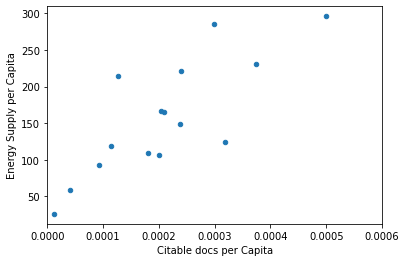

In [324]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [456]:
# Incorrect answer

# def answer_ten():
#     Top15 = answer_one()
#     renew_median = Top15['% Renewable'].median()

#     Top15['HighRenew'] = [1 if x > renew_median else 0 for x in Top15['% Renewable']]
#     return Top15['HighRenew']

# answer_ten()

def answer_ten():
    import numpy as np
    Top15 = answer_one()
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= np.median(Top15['% Renewable']),1,0)
    
    return Top15['HighRenew']

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [361]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [ ]:
# TODO:
# [x] Calculate the estimated population of each country
# [x] Use the dictionary to groupby
# [x] Create a dataframe that displays the sample size, sum, mean and std for the est. population

In [380]:
def answer_eleven():
    Top15 = answer_one()
    Top15['pop_est'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    df = Top15.groupby(ContinentDict).agg({'pop_est' : [np.size, np.sum, np.mean, np.std] })

    # https://www.coursera.org/learn/python-data-analysis/discussions/weeks/3/threads/pUu5GbPCEeefpw51rAEiYg 
    # output is a multi-index, which is why we need to use droplevel
    df.columns = df.columns.droplevel(0)
    return df

answer_eleven()

,size,sum,mean,std
Asia,5.00000,2898666386.61060,579733277.32212,679097888.36610
Australia,1.00000,23316017.31602,23316017.31602,nan
Europe,6.00000,457929667.21637,76321611.20273,34647667.06562
North America,2.00000,352855249.48025,176427624.74012,199669644.85667
South America,1.00000,205915254.23729,205915254.23729,nan


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [411]:
def answer_twelve():
    Top15 = answer_one()
    # https://www.coursera.org/learn/python-data-analysis/discussions/weeks/3/threads/omM_7L_3EeezMQ4NzSCjvA
    return Top15.groupby([pd.Series(ContinentDict), pd.cut(Top15['% Renewable'], 5)], observed=True).size()

answer_twelve()

               % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [434]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return Top15['PopEst'].apply('{:,}'.format)

answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [435]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


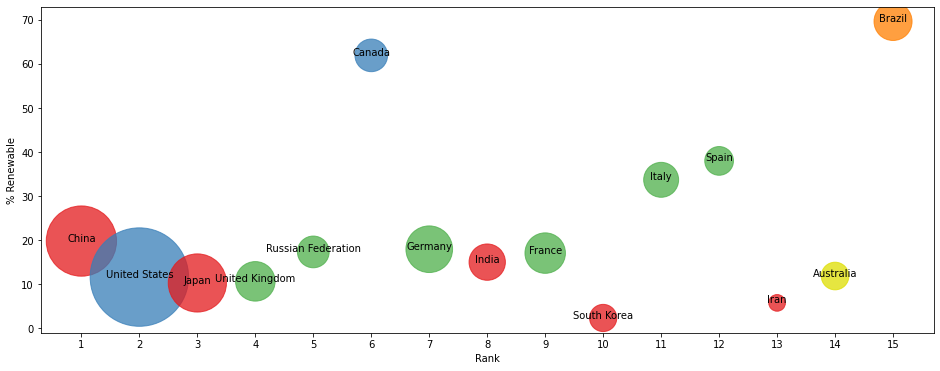

In [436]:
plot_optional()